In [1]:
## K-평균 장점 : 간결
##        단점 : 거리기반 알고리즘으로 속성개수 많을 경우 군집화 정확도 떨어짐, 수행시간, 몇개의 군집을 선택할 지 가이드 힘들다

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


Bad key "axes_unicode_minus" on line 3 in
/home/jovyan/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
KMeans()
# 결과 labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블, cluster_centers_:각 군집 중심점 좌표(shape는 [군집개수, 피처개수])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
col=[]
for i in iris.feature_names:
    j = i.split(' ')
    col.append(j[0]+'_'+j[1])
col
    

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [9]:
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=col)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

In [11]:
kmeans.labels_ # n_clusters=3으로 3개 군집에 어디에 소속되었는지 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
print(kmeans.cluster_centers_) # 각 군집 중심점 좌표
print(kmeans.cluster_centers_.shape)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
(3, 4)


In [15]:
# cluster 0, 1, 2와 실제 iris target 0, 1, 2 얼마나 차이가 나는지 개수 비교
irisDF['cluster']=kmeans.labels_

irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result) # target 2 값이 분산되어 그룹핑되었음

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [19]:
# 시각화위해 pca 차원축소하여 column 추가
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)
print(iris_pca.shape) #(150,2)
irisDF['pca_x']=iris_pca[:,0]
irisDF['pca_y']=iris_pca[:,1]
irisDF.head(3)

(150, 2)


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


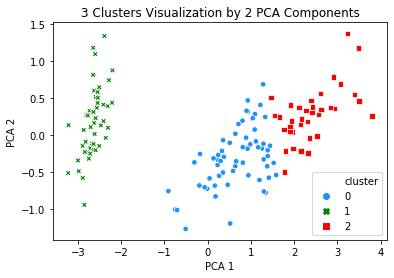

In [43]:
import seaborn as sns
# color_dict = dict({'Africa':'brown','Asia':'green','Europe': 'orange','Oceania': 'red','Americas': 'dodgerblue'})
ax=sns.scatterplot(x='pca_x',
            y='pca_y',
           hue='cluster',  # different colors by group
           palette=['dodgerblue','green', 'red'],  # 'brown','orange' # palette=color_dict
           style='cluster',# different shapes by group
           s=30,
           legend='full', #legend=False, # legend='brief',
           data=irisDF) 
 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
#ax.set(xscale="log")
plt.show()

In [44]:
### Clustering 알고리즘 테스트를 위한 데이터 생성 

## 데이터생성기
* make_blobs(), make_classification() ==> 여러개 클래스 (하나의 클래스에 여러개 군집 분포) ==> 분류용도
    * make_blobs() 개별 군집의 중심점과 표준편차 제어기능 추가  
      - 표준편차 cluster_std값(0.4, 0.8, 1.2, 1.6)이 작을 수록 군집중심에 데이터가 모임
    * make_classification() 노이즈를 포함한 데이터 
* make_circle(), make_moon()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 
       #centers=3 군집수 # cluster_std=[0.8,1.2,0.6]  cluster_std값(0.4, 0.8, 1.2, 1.6)이 작을 수록 군집중심에 데이터가 모임
print(X[:5])
print(y[:5])
print(X.shape, y.shape)

In [48]:
# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

[0 1 2] [67 67 66]


In [52]:
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


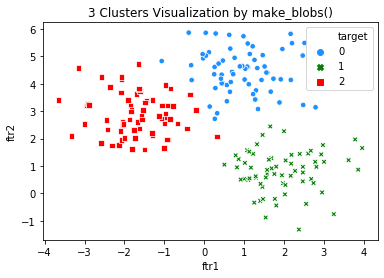

In [55]:
import seaborn as sns
# color_dict = dict({'Africa':'brown','Asia':'green','Europe': 'orange','Oceania': 'red','Americas': 'dodgerblue'})
ax=sns.scatterplot(x='ftr1',
            y='ftr2',
           hue='target',  # different colors by group
           palette=['dodgerblue','green', 'red'],  # 'brown','orange' # palette=color_dict
           style='target',# different shapes by group
           s=30,
           legend='full', #legend=False, # legend='brief',
           data=clusterDF) 
 
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by make_blobs()')
#ax.set(xscale="log")
plt.show()

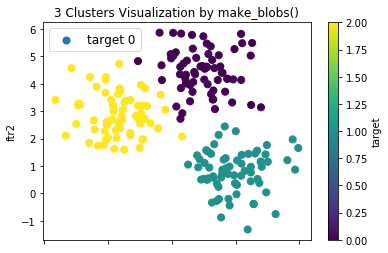

In [83]:
# 판다스로 시각화
clusterDF.plot(kind='scatter', # figsize=(,)
               x='ftr1',
               y='ftr2',
               s=50,
               #colorbar='target', # c="green"과 같이 칼라를 주거나 c='column'으로 주었을 경우 colormap을 통해 색깔을 구분해 준다
               c='target',
               colormap='viridis',
               #style='target',
               legend=True) # tuple(["g", "b","r","y","k"]) # legend : False/True/'reverse'
plt.legend(['target 0', 'target 1', 'target 2'], fontsize=12)
plt.title('3 Clusters Visualization by make_blobs()')
#ax.set(xscale="log")
plt.show()

In [86]:
# plt.scatter 시각화
target_list = np.unique(y)
target_list

array([0, 1, 2])

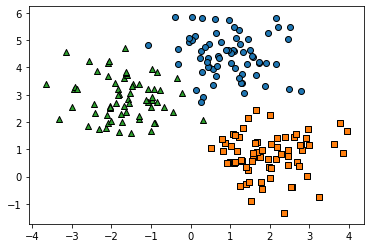

In [84]:
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

In [87]:
## KMeans cluster 적용

In [89]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit_predict(X)
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
# kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [95]:
# kmeans_label column 추가
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels
clusterDF.head(3)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


In [96]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
# iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
# print(iris_result) # target 2 값이 분산되어 그룹핑되었음

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [91]:
#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [99]:
centers = kmeans.cluster_centers_


array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [93]:
unique_labels = np.unique(cluster_labels)
unique_labels

array([0, 1, 2], dtype=int32)

In [94]:
##  시각화

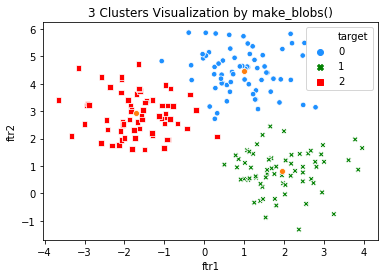

In [102]:
import seaborn as sns
# color_dict = dict({'Africa':'brown','Asia':'green','Europe': 'orange','Oceania': 'red','Americas': 'dodgerblue'})
sns.scatterplot(x='ftr1',
            y='ftr2',
           hue='target',  # different colors by group
           palette=['dodgerblue','green', 'red'],  # 'brown','orange' # palette=color_dict
           style='target',# different shapes by group
           s=30,
           legend='full', #legend=False, # legend='brief',
           data=clusterDF) 

# cluster 중심 표시
sns.scatterplot(x=centers[:,0],
            y=centers[:,1],
           data=clusterDF) 

# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by make_blobs()')
#ax.set(xscale="log")
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


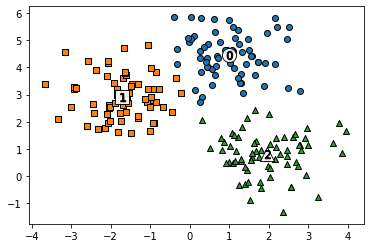

In [103]:
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()